# Photo-nuclear physics v2.3.0 validation
### Omar Moreno, SLAC National Accelerator Laboratory

---

Detector: v12


In [1]:
import warnings
warnings.filterwarnings("ignore")

import uproot4
import awkward1 as ak
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import mplhep

In [2]:
def errors(values): 
    
    err = [np.sqrt(x) for x in values]
    errmin = []
    errmax = []
    for x,err in zip(values,err):
        errmin.append(x-err/2)
        errmax.append(x+err/2)

    return errmin, errmax
    
def draw_histogram1D(ax, histo, **kargs):
    
    values = histo.values()[1:-1]
    xedges = histo.edges(0)[1:-1]
    bin_centers = (xedges + (xedges[1] - xedges[0])/2)[:-1]
    
    err_min = np.zeros(len(values))
    err_max = np.zeros(len(values))
    if 'errors' in kargs: 
        err_min, err_max = errors(values)
    
    if 'norm' in kargs:
        integral = np.sum(values)
        values = values/integral
        
        if 'errors' in kargs: 
            err_min = np.array(err_min)/integral
            err_max = np.array(err_max)/integral

    ax.vlines(bin_centers, err_min, err_max, color='#4C72B0')
        
    ls='-'
    if 'linestyle' in kargs: 
        ls = kargs['linestyle']
        
    if 'x_label' in kargs: 
        ax.set_xlabel(kargs['x_label'], fontsize=30)
    
    if 'errors' in kargs: 
        errors
        
    edgecolor = None
    if 'edgecolor' in kargs:
        edgecolor = kargs['edgecolor']
        
        
    matplotlib.rcParams.update({'font.size': 22})
    
    ax.hist(bin_centers, bins=xedges, weights=values, alpha=0.5, linewidth=2, 
            edgecolor=edgecolor)
    
    ax.minorticks_on()
    ax.tick_params(which='major', length=10, width=2, direction='inout', labelsize=30)
    ax.tick_params(which='minor', length=5, width=2, direction='in', labelsize=30)
    
    if 'tick_labels' in kargs: 
        tick_labels = kargs['tick_labels']
        ax.set_xticklabels(tick_labels, fontdict={'fontsize': 15})
        ax.set_xticks(xedges[:(len(tick_labels) - len(xedges))])
        ax.tick_params(axis='x', which='minor', length=0)
        
        offset = matplotlib.transforms.ScaledTranslation((xedges[1] - xedges[0])/4, 0, fig.dpi_scale_trans)
        for label in ax.xaxis.get_majorticklabels(): 
            label.set_transform(label.get_transform() + offset)
        plt.xticks(rotation=75)
    
    ax.set_title('LDMX Simulation Internal', x=.75, fontweight='bold')
 

In [3]:
histograms = uproot4.open('mc.root')

event_types = ['', 'Nothing hard', 'n', 'nn', '$\geq$ 3n', '$\pi$', '$\pi\pi$',
               '$\pi_0$', '$\pi$A', '$\pi$2A', '$\pi\pi$A', '$\pi_0$A', 
               '$\pi_0$2A', '$\pi_0\pi$A', 'p', 'pp', 'pn', '$K_L^0$X', '$K$X', 
               '$K_S^0$X', 'exotics', 'multi-body']
event_types_compact = ['', 'n', '$K^{\pm}$X', '$K^0$', 'nn', 'soft', 'other']
n_event_types = ['', '', 'nn', 'pn', '$\pi^+$n', '$\pi^0$n']

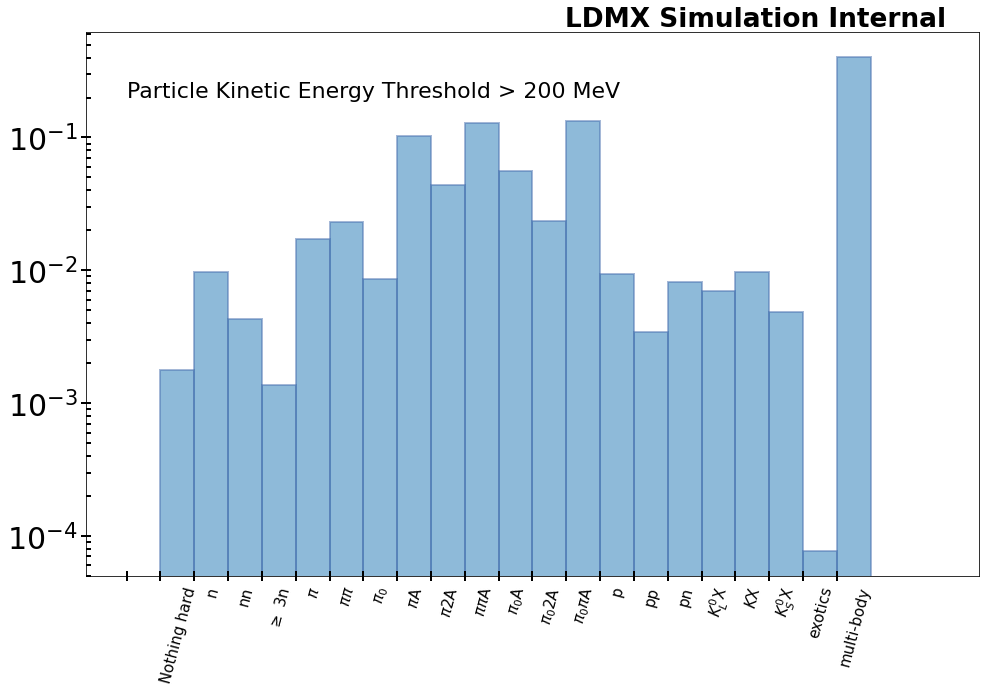

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_event_type'], norm=True, 
                 tick_labels=event_types, edgecolor='#4C72B0')
ax.text(-1, .2, 'Particle Kinetic Energy Threshold > 200 MeV')
ax.set_yscale("log")

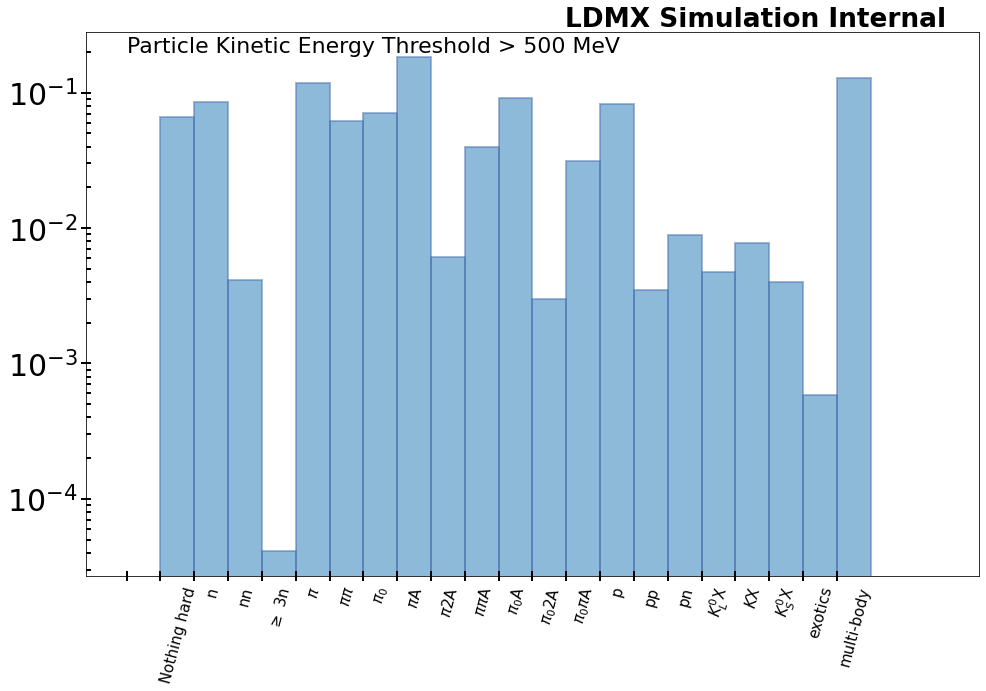

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_event_type_500mev'], norm=True,
                 tick_labels=event_types, edgecolor='#4C72B0')
ax.text(-1, .2, 'Particle Kinetic Energy Threshold > 500 MeV')
ax.set_yscale("log")

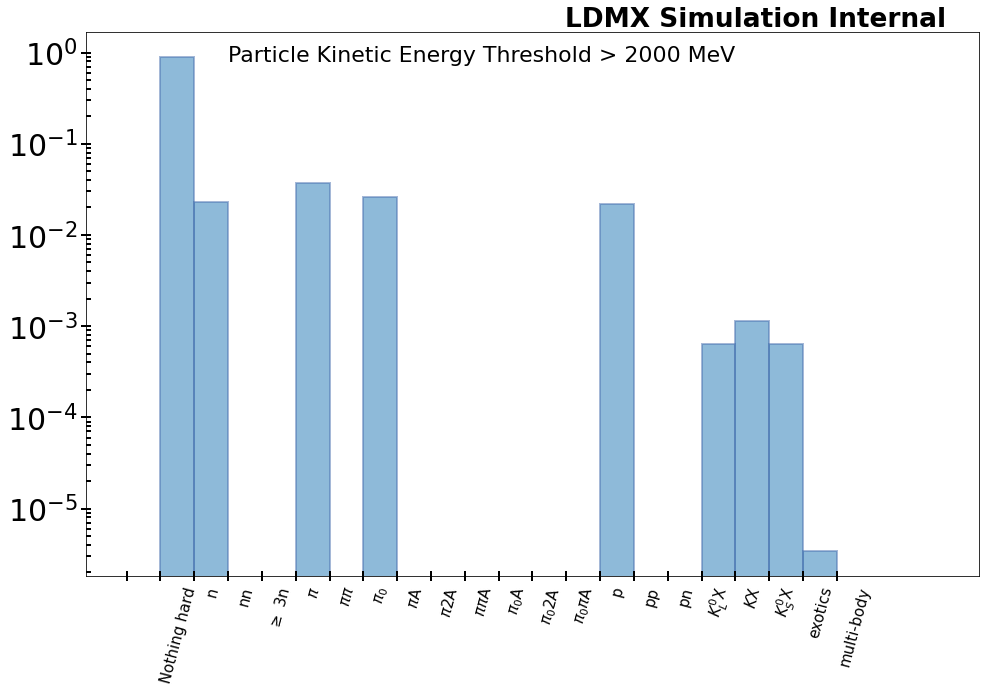

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_event_type_2000mev'], norm=True, 
                 tick_labels=event_types, edgecolor='#4C72B0')
ax.text(2, .8, 'Particle Kinetic Energy Threshold > 2000 MeV')
ax.set_yscale("log")

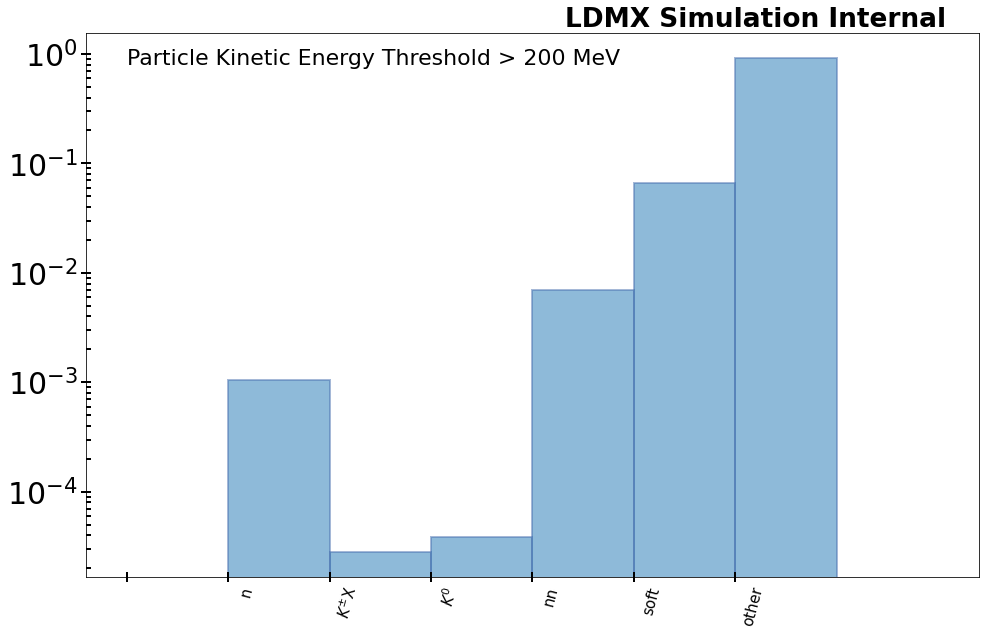

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_event_type_compact'], norm=True, 
                 tick_labels=event_types_compact, edgecolor='#4C72B0')
ax.text(-1, .8, 'Particle Kinetic Energy Threshold > 200 MeV')
ax.set_yscale("log")

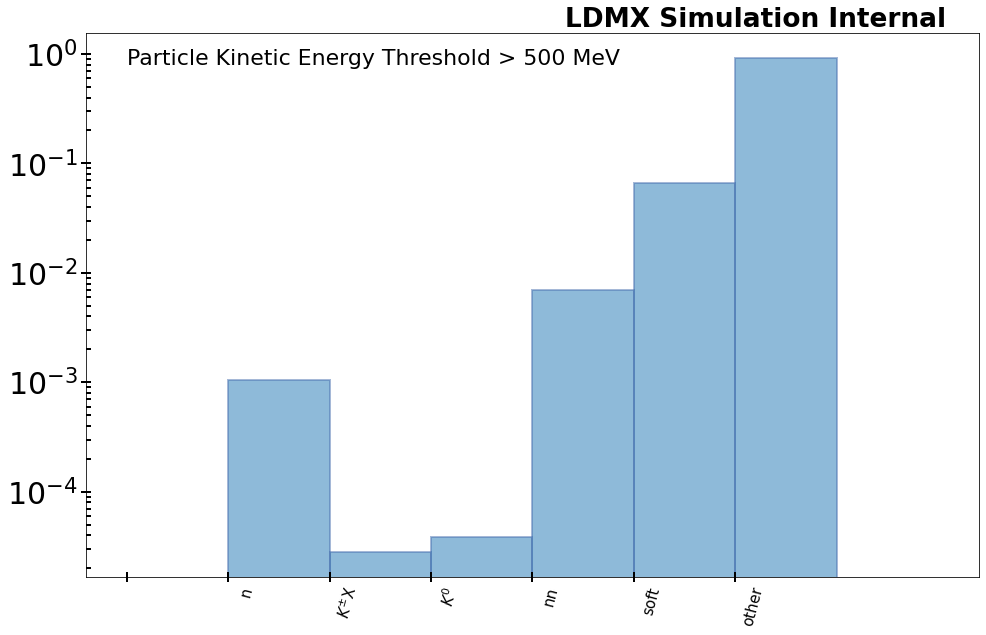

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_event_type_compact_500mev'], norm=True, 
                 tick_labels=event_types_compact, edgecolor='#4C72B0')
ax.text(-1, .8, 'Particle Kinetic Energy Threshold > 500 MeV')
ax.set_yscale("log")

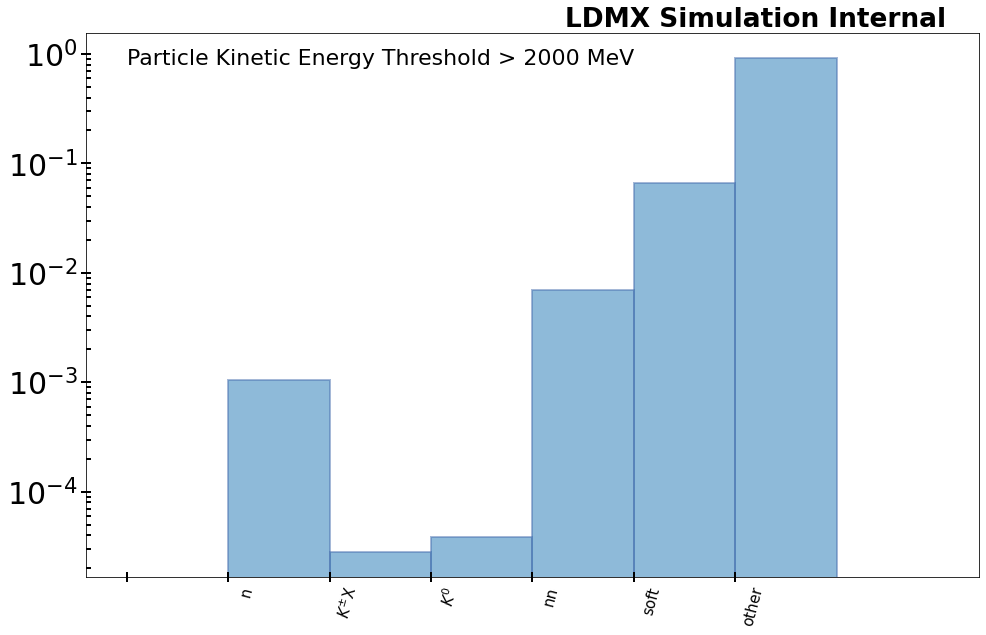

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_event_type_compact_2000mev'], norm=True, 
                 tick_labels=event_types_compact, edgecolor='#4C72B0')
ax.text(-1, .8, 'Particle Kinetic Energy Threshold > 2000 MeV')
ax.set_yscale("log")

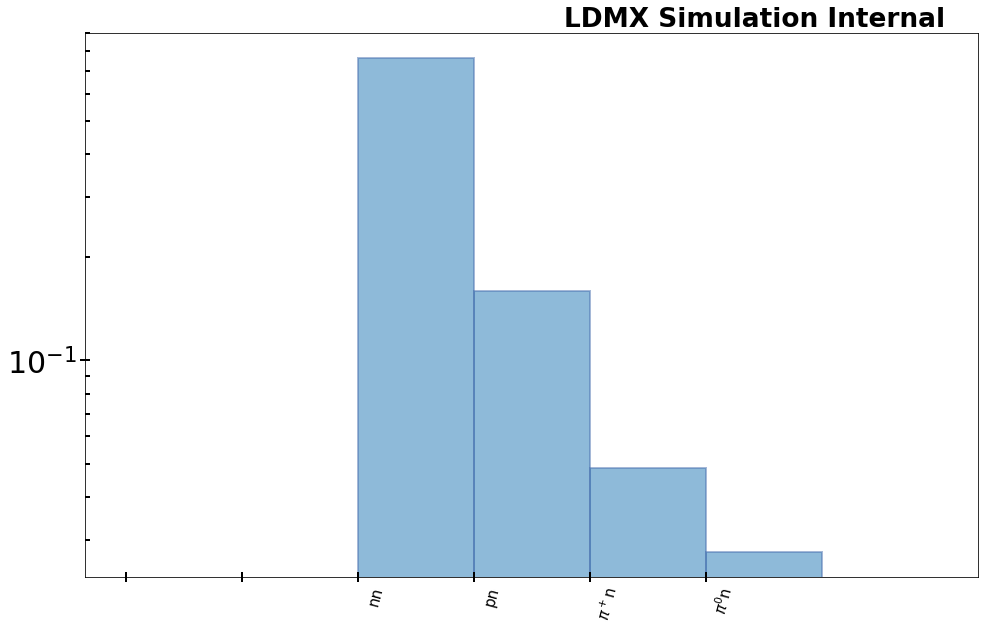

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_1n_event_type'], norm=True, 
                 tick_labels=n_event_types, edgecolor='#4C72B0')
ax.set_yscale("log")

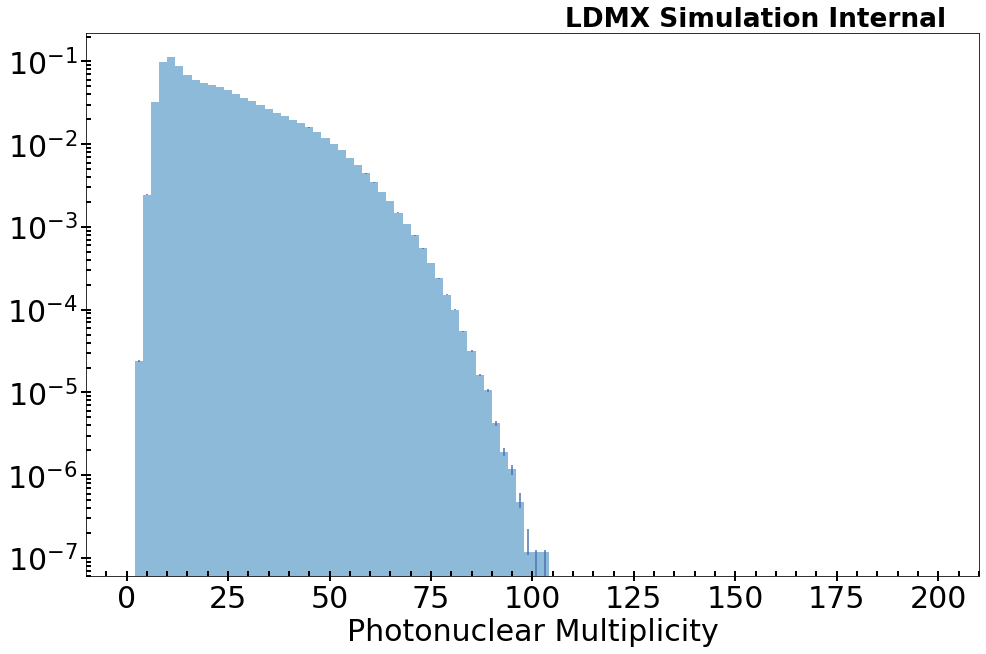

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_pn_particle_mult'], norm=True, errors=True,
                 x_label='Photonuclear Multiplicity')
ax.set_yscale("log")

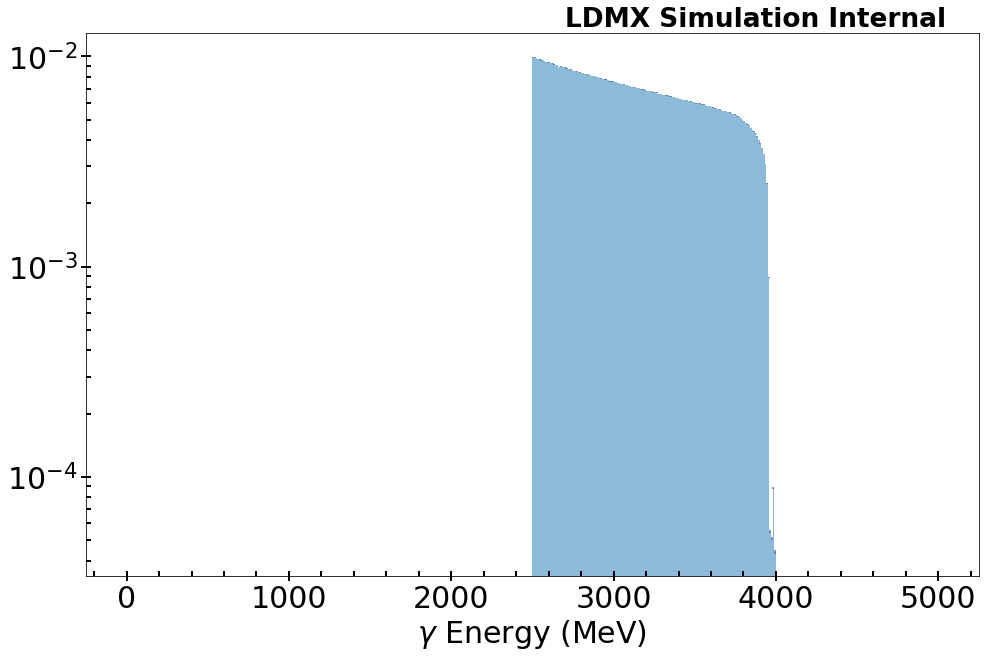

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_pn_gamma_energy'], norm=True, errors=True,
                 x_label='$\gamma$ Energy (MeV)')
ax.set_yscale("log")

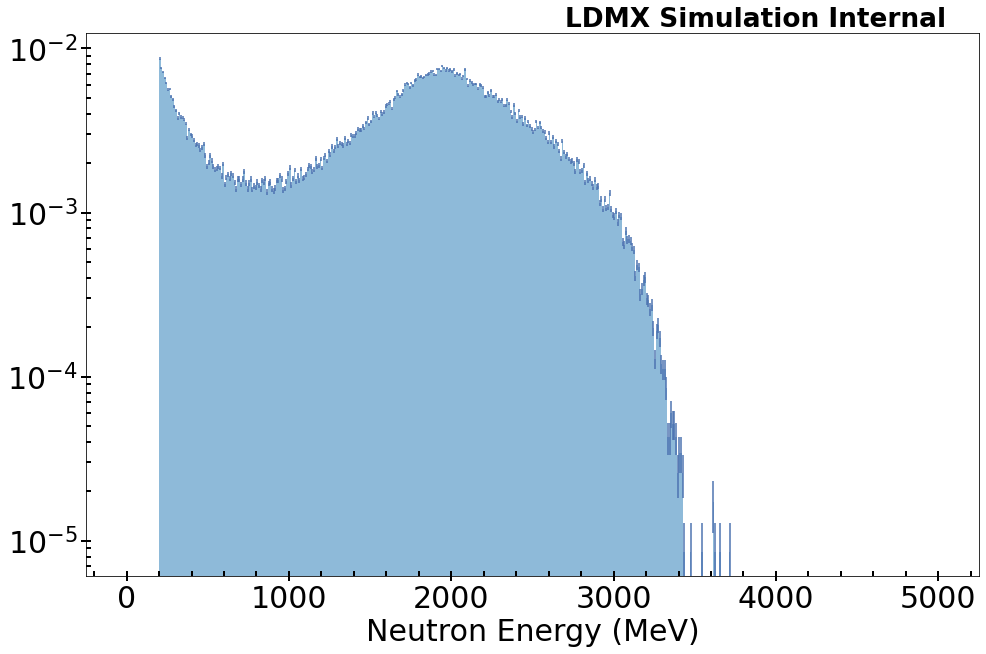

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_1n_neutron_energy'], norm=True, errors=True,
                 x_label='Neutron Energy (MeV)')
ax.set_yscale("log")

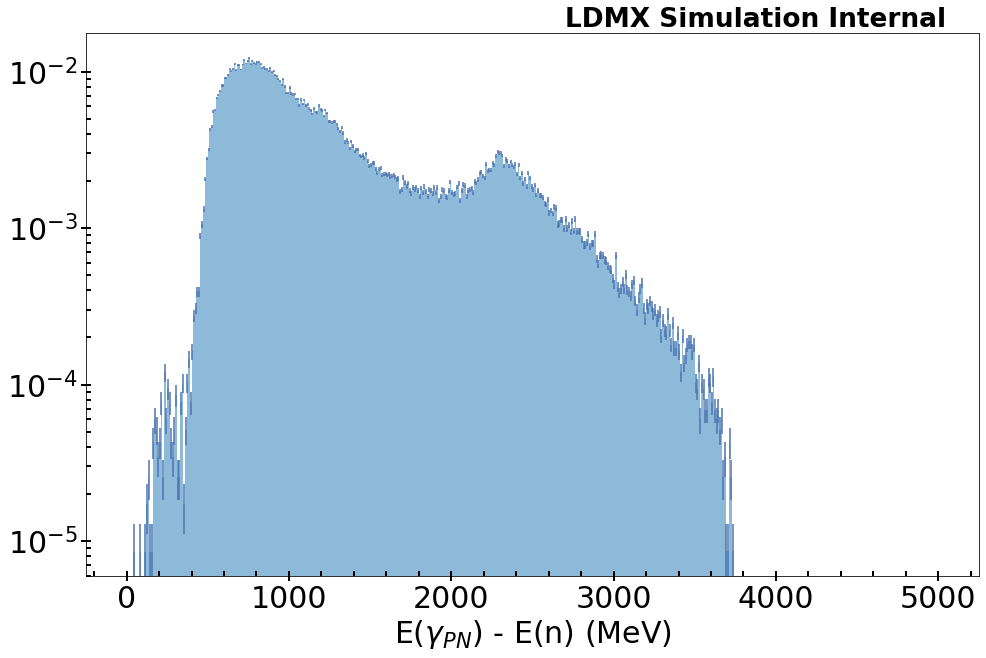

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_1n_energy_diff'], norm=True, errors=True,
                 x_label='E($\gamma_{PN}$) - E(n) (MeV)')
ax.set_yscale("log")

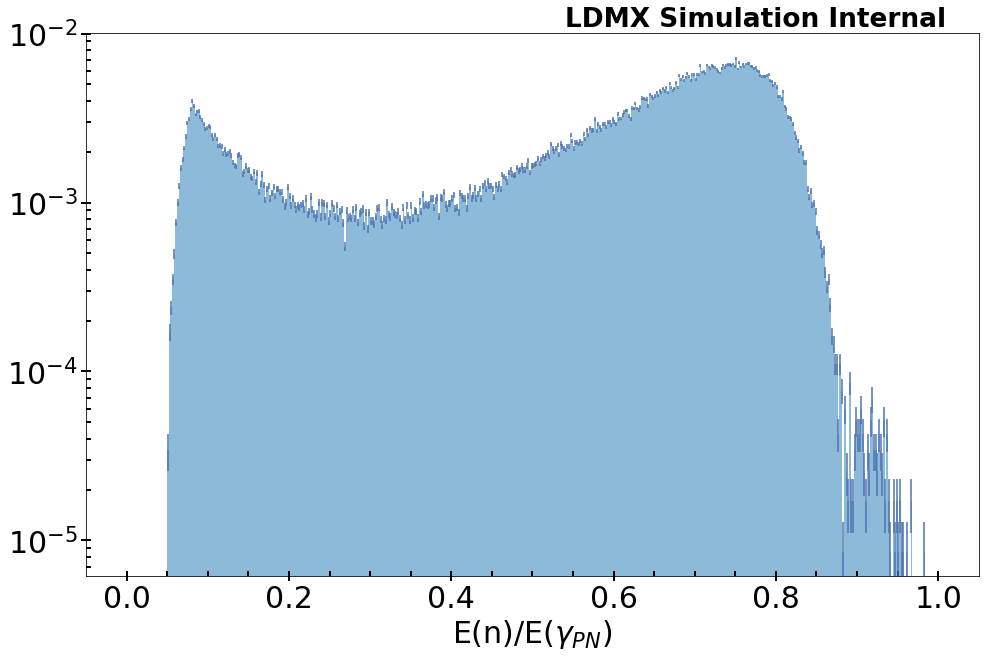

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_1n_energy_frac'], norm=True, errors=True,
                 x_label='E(n)/E($\gamma_{PN}$)')
ax.set_yscale("log")

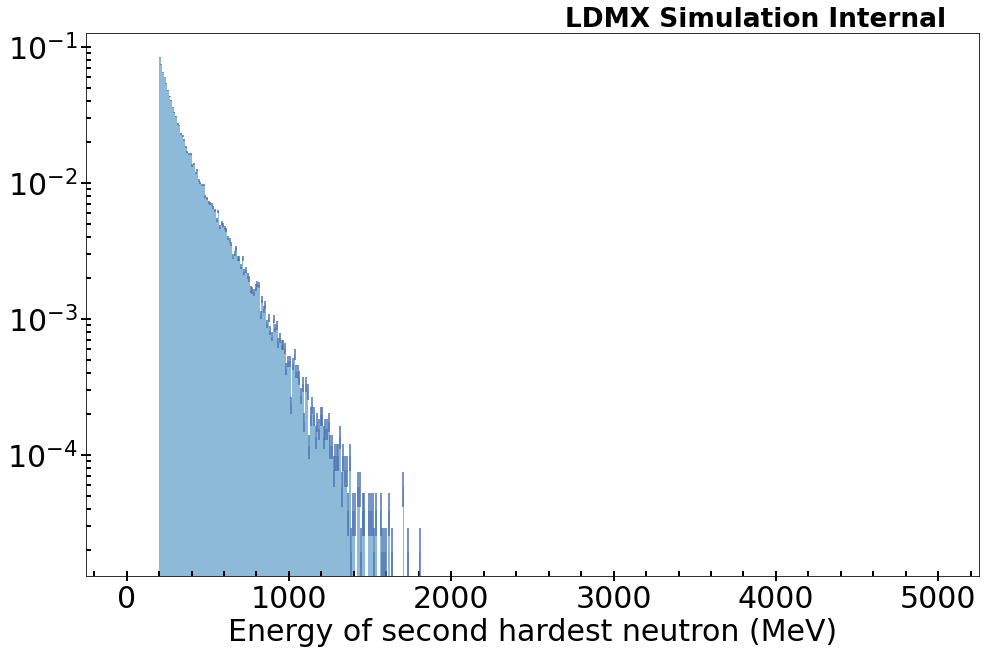

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_2n_n2_energy'], norm=True, errors=True,
                 x_label='Energy of second hardest neutron (MeV)')
ax.set_yscale("log")

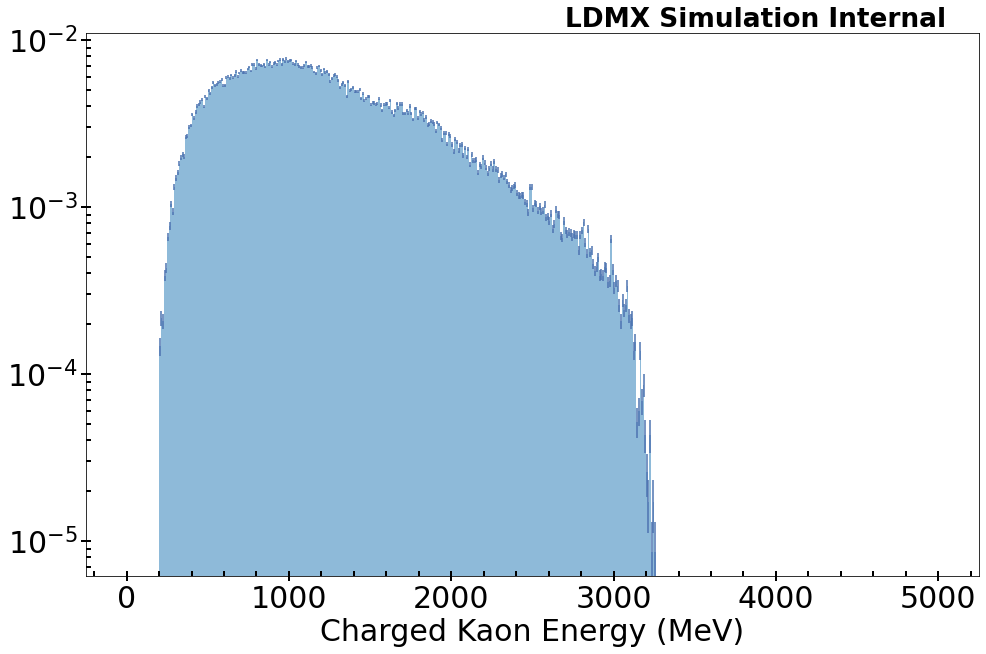

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_1kp_energy'], norm=True, errors=True,
                 x_label='Charged Kaon Energy (MeV)')
ax.set_yscale("log")

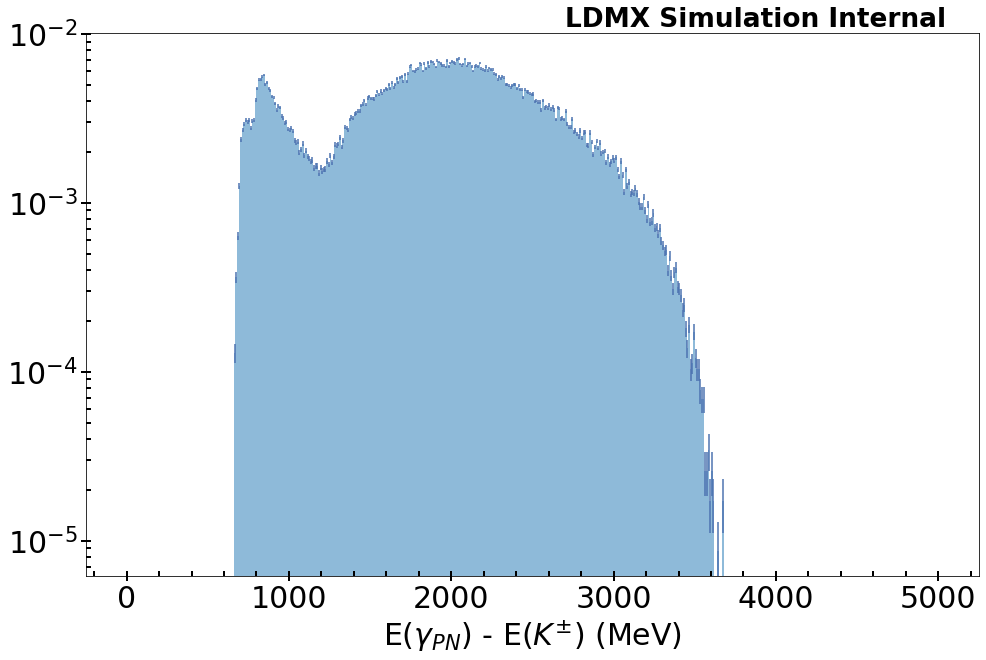

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_1kp_energy_diff'], norm=True, errors=True,
                 x_label='E($\gamma_{PN}$) - E($K^{\pm}$) (MeV)')
ax.set_yscale("log")

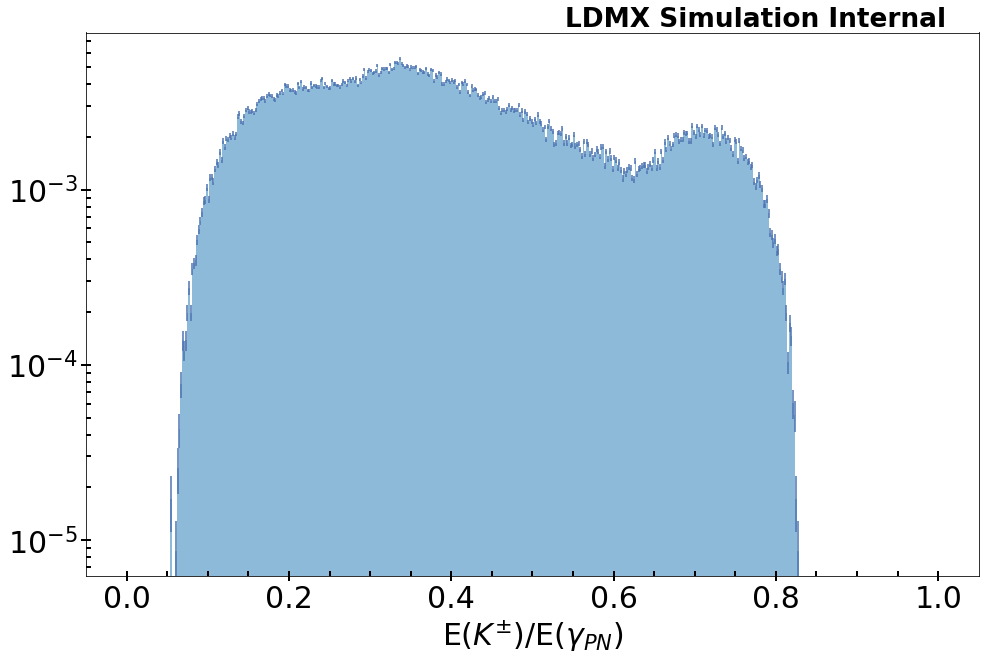

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_1kp_energy_frac'], norm=True, errors=True,
                 x_label='E($K^{\pm}$)/E($\gamma_{PN}$)')
ax.set_yscale("log")

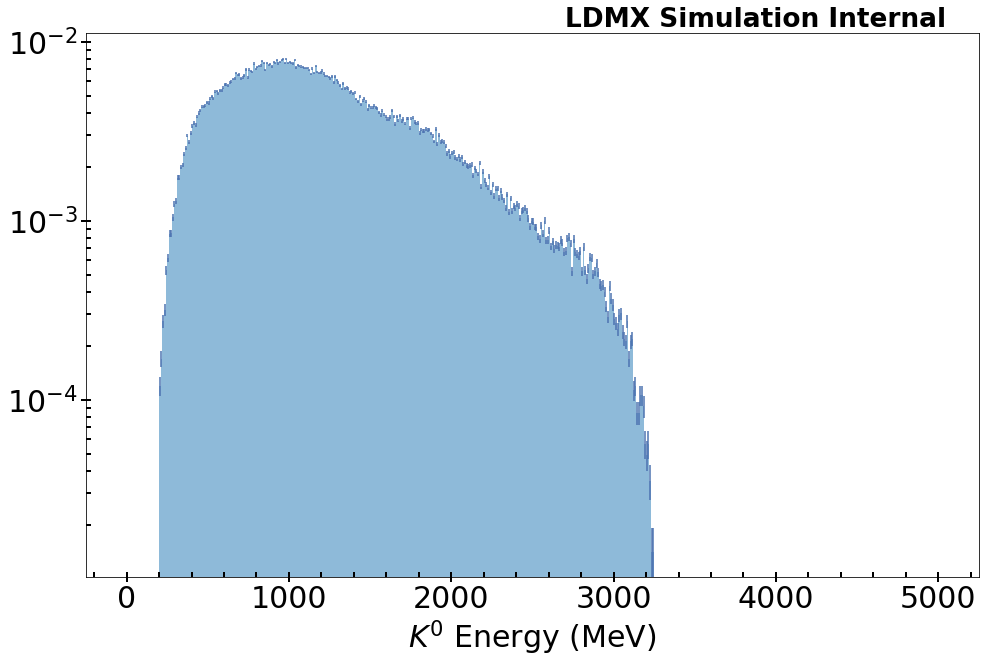

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_1k0_energy'], norm=True, errors=True,
                 x_label='$K^0$ Energy (MeV)')
ax.set_yscale("log")

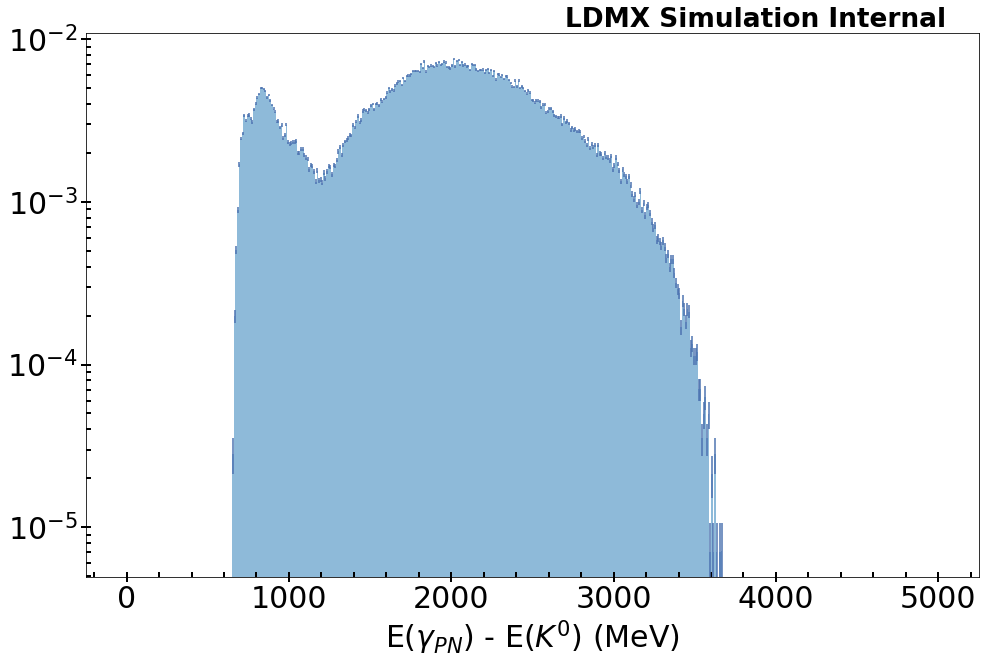

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_1k0_energy_diff'], norm=True, errors=True,
                 x_label='E($\gamma_{PN}$) - E($K^0$) (MeV)')
ax.set_yscale("log")

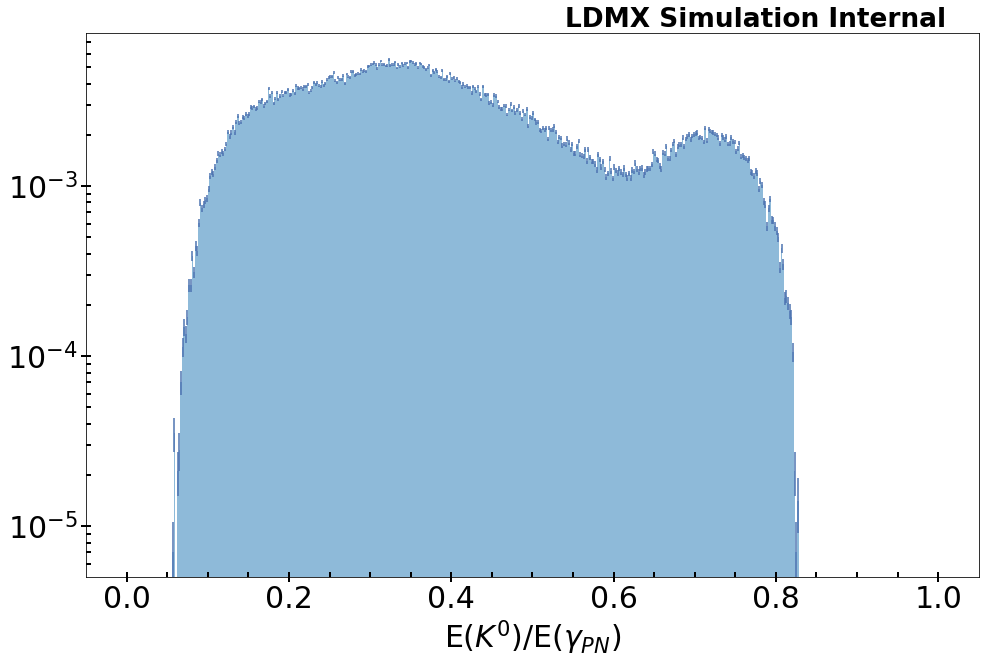

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_1k0_energy_frac'], norm=True, errors=True,
                 x_label='E($K^0$)/E($\gamma_{PN}$)')
ax.set_yscale("log")

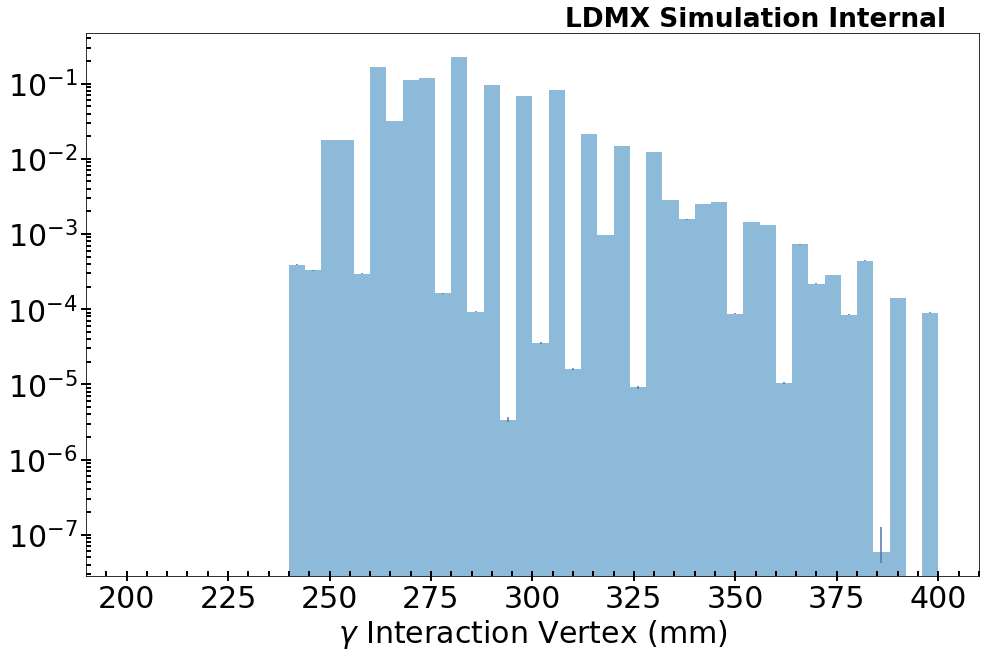

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_pn_gamma_int_z'], norm=True, errors=True,
                 x_label='$\gamma$ Interaction Vertex (mm)')
ax.set_yscale("log")

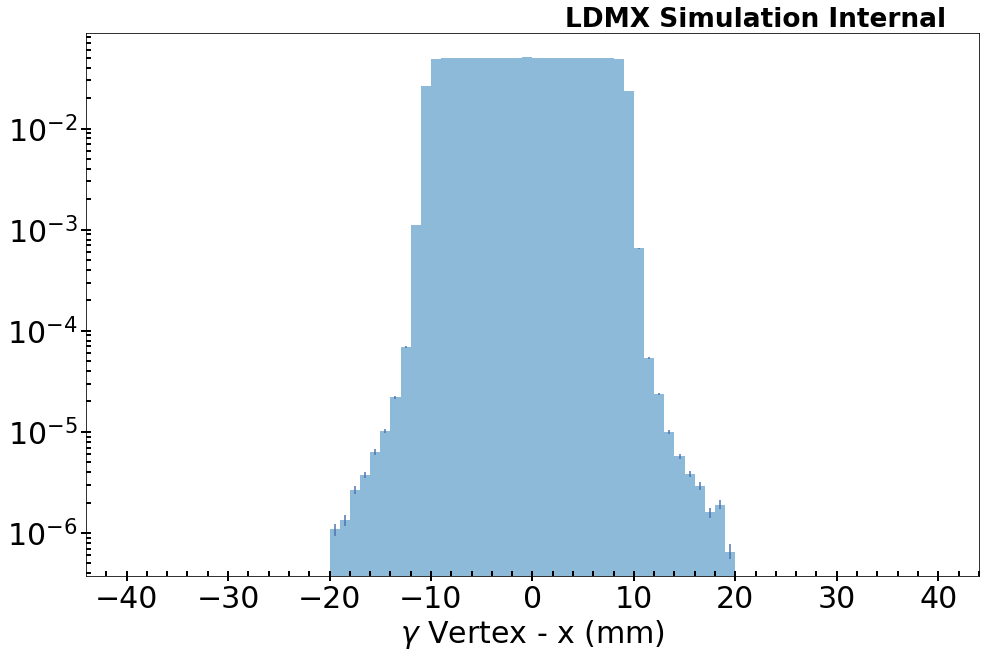

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_pn_gamma_vertex_x'], norm=True, errors=True,
                 x_label='$\gamma$ Vertex - x (mm)')
ax.set_yscale("log")

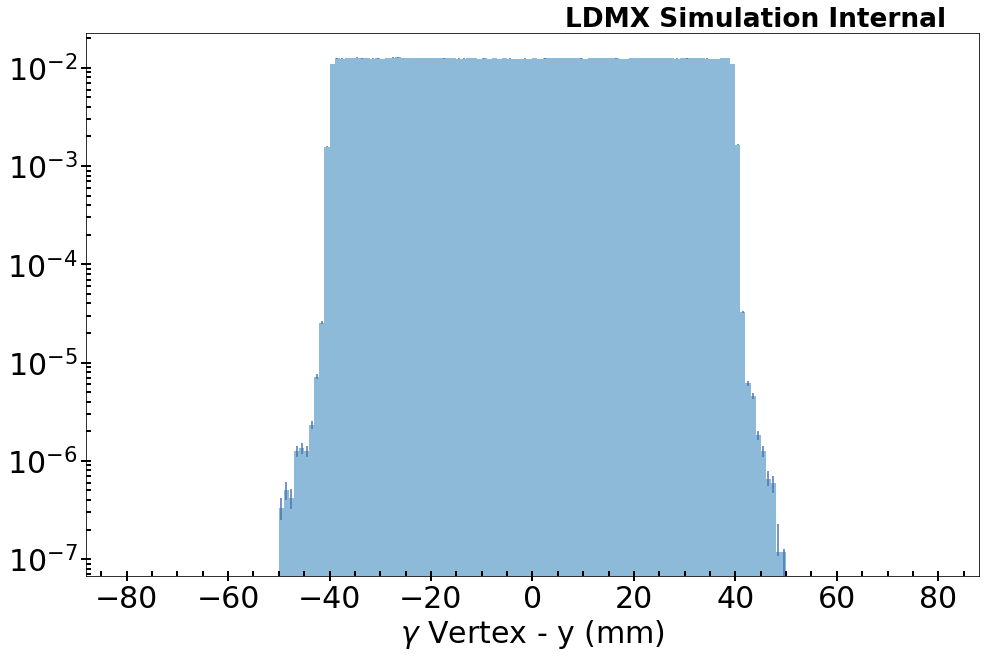

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_pn_gamma_vertex_y'], norm=True, errors=True,
                 x_label='$\gamma$ Vertex - y (mm)')
ax.set_yscale("log")

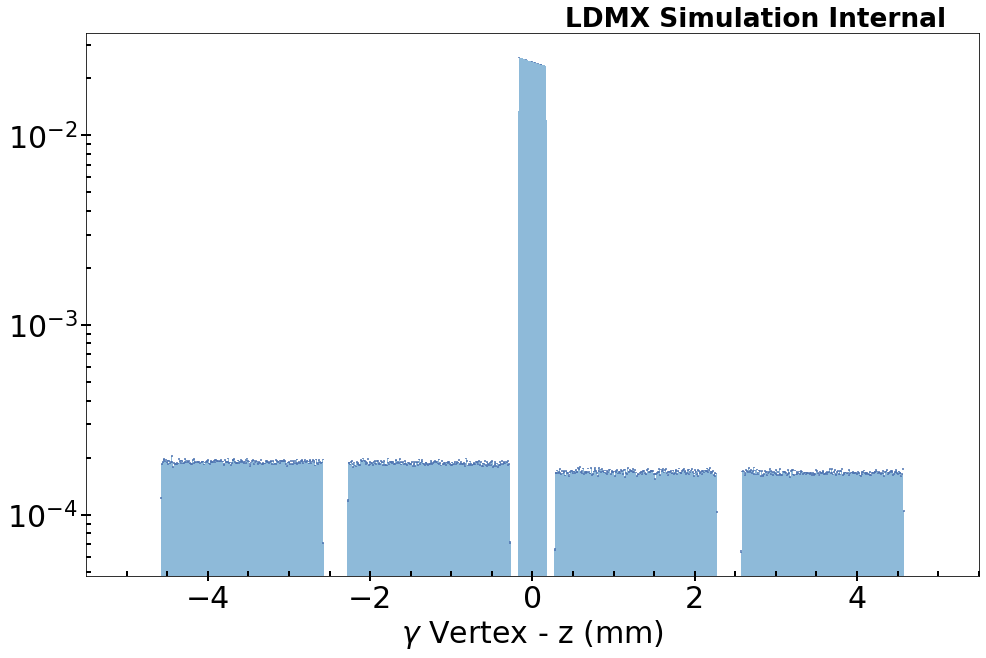

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_pn_gamma_vertex_z'], norm=True, errors=True,
                 x_label='$\gamma$ Vertex - z (mm)')
ax.set_yscale("log")

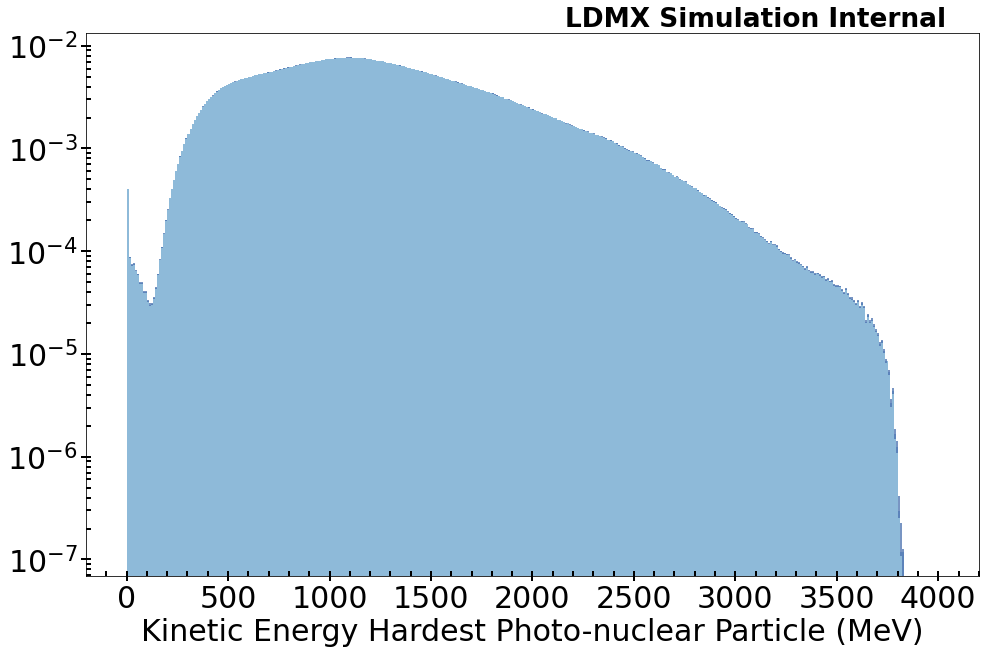

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_hardest_ke'], norm=True, errors=True,
                 x_label='Kinetic Energy Hardest Photo-nuclear Particle (MeV)')
ax.set_yscale("log")

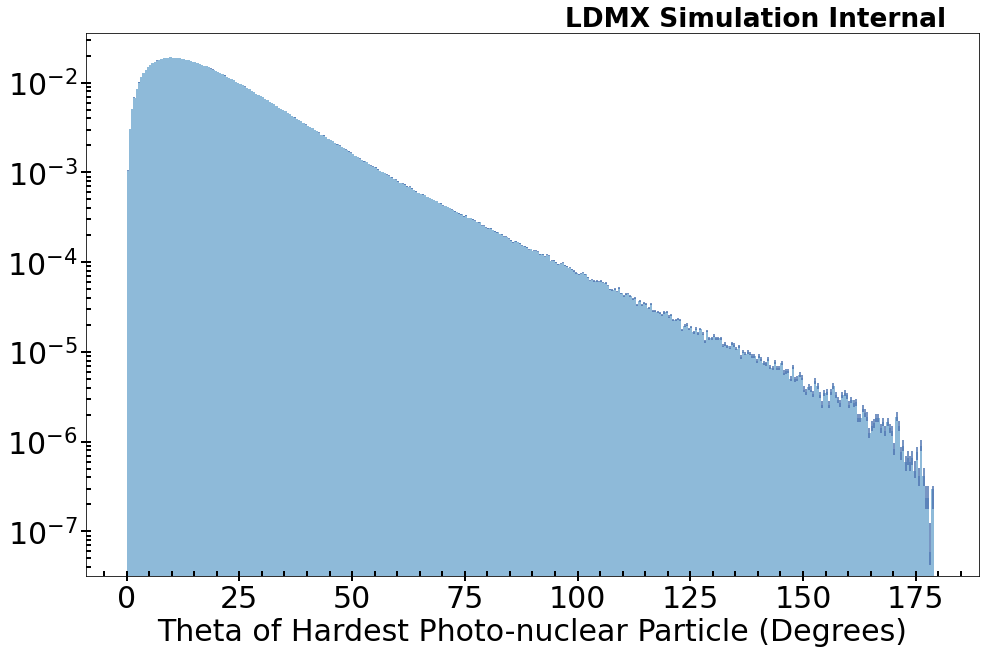

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_hardest_theta'], norm=True, errors=True,
                 x_label='Theta of Hardest Photo-nuclear Particle (Degrees)')
ax.set_yscale("log")

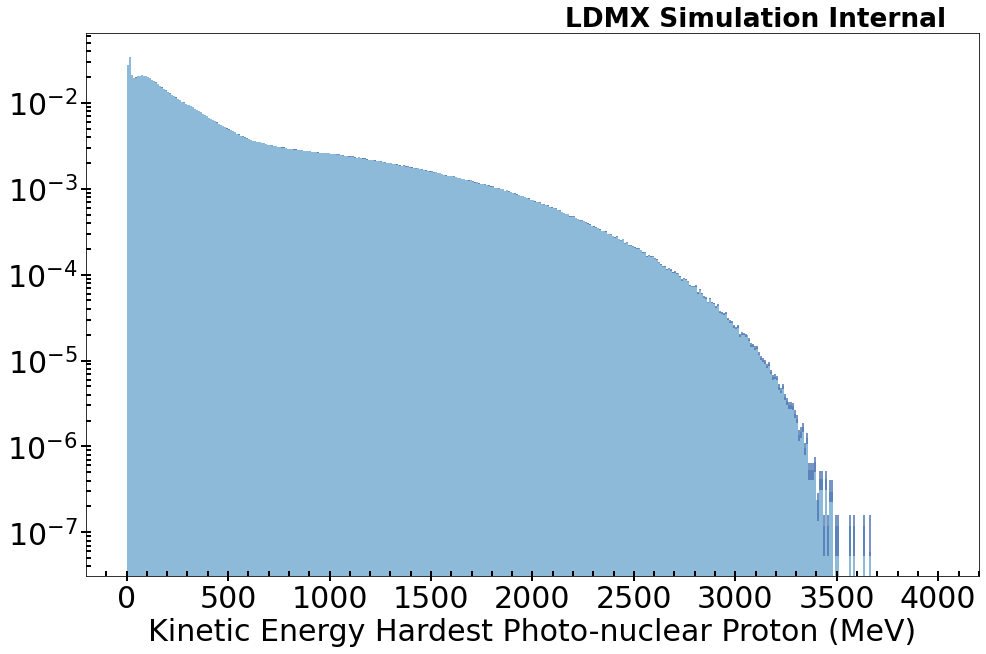

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_hardest_p_ke'], norm=True, errors=True,
                 x_label='Kinetic Energy Hardest Photo-nuclear Proton (MeV)')
ax.set_yscale("log")

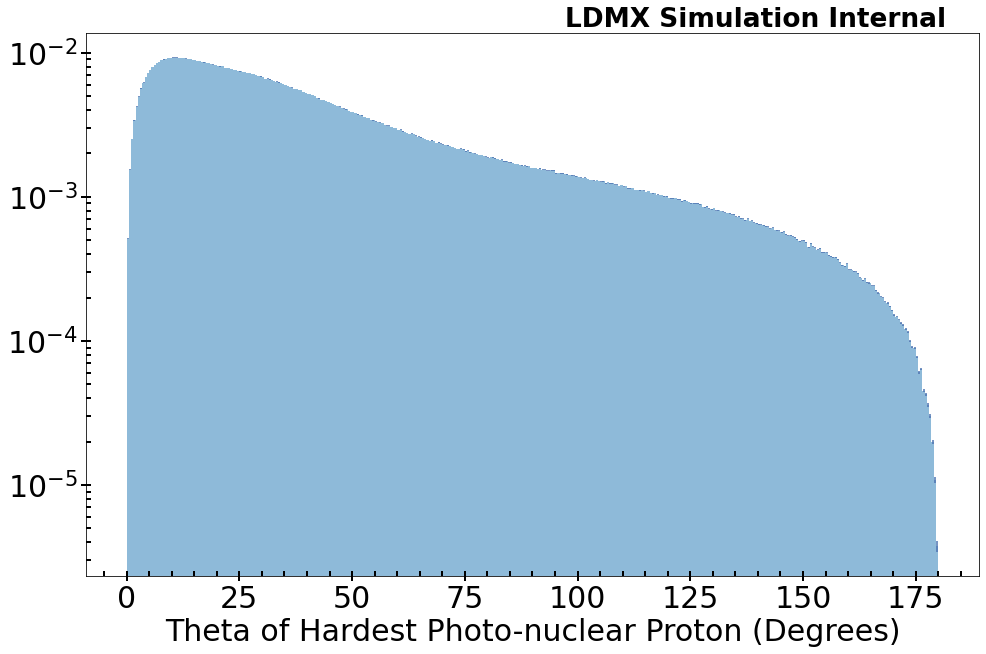

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_hardest_p_theta'], norm=True, errors=True,
                 x_label='Theta of Hardest Photo-nuclear Proton (Degrees)')
ax.set_yscale("log")

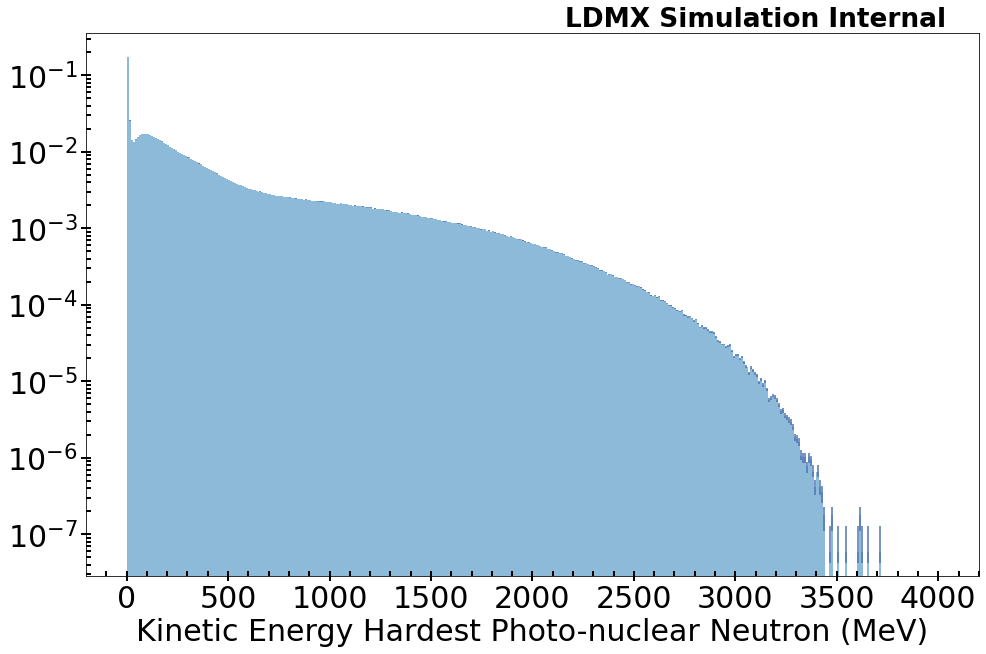

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_hardest_n_ke'], norm=True, errors=True,
                 x_label='Kinetic Energy Hardest Photo-nuclear Neutron (MeV)')
ax.set_yscale("log")

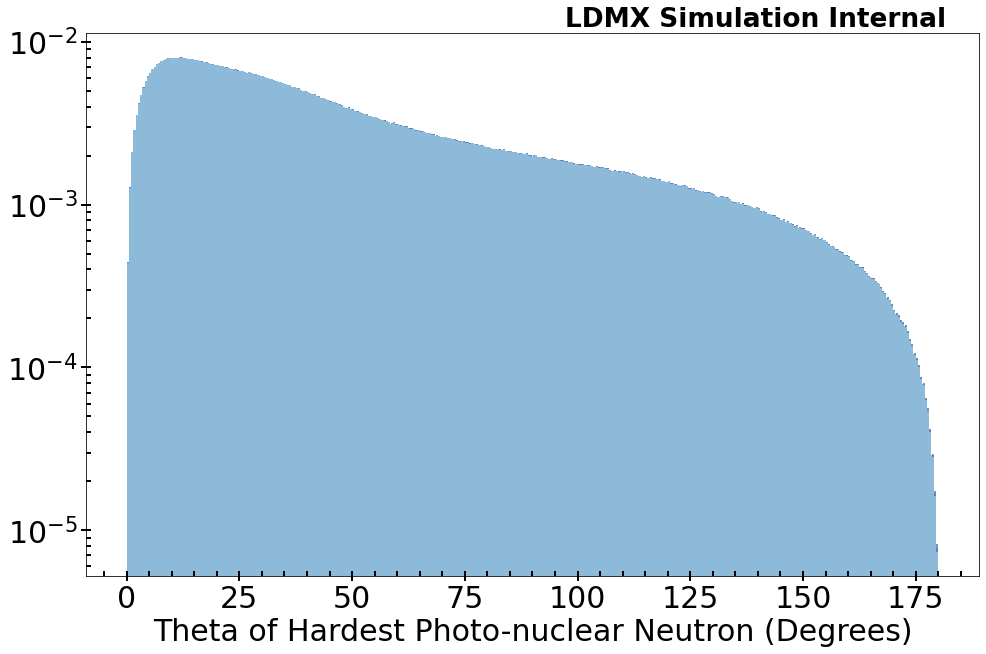

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_hardest_n_theta'], norm=True, errors=True,
                 x_label='Theta of Hardest Photo-nuclear Neutron (Degrees)')
ax.set_yscale("log")

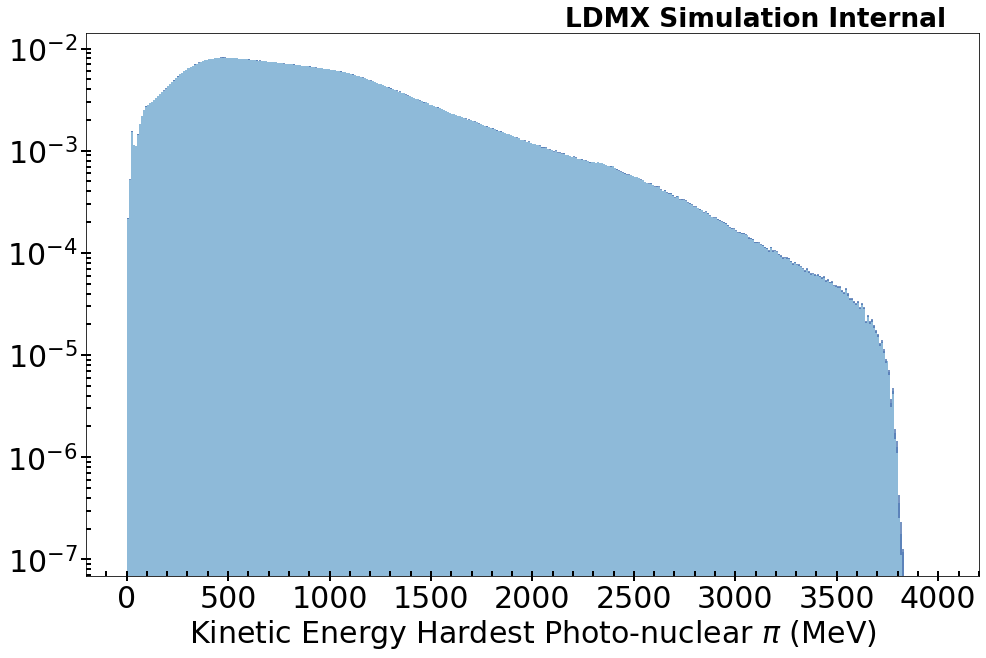

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_hardest_pi_ke'], norm=True, errors=True,
                 x_label='Kinetic Energy Hardest Photo-nuclear $\pi$ (MeV)')
ax.set_yscale("log")

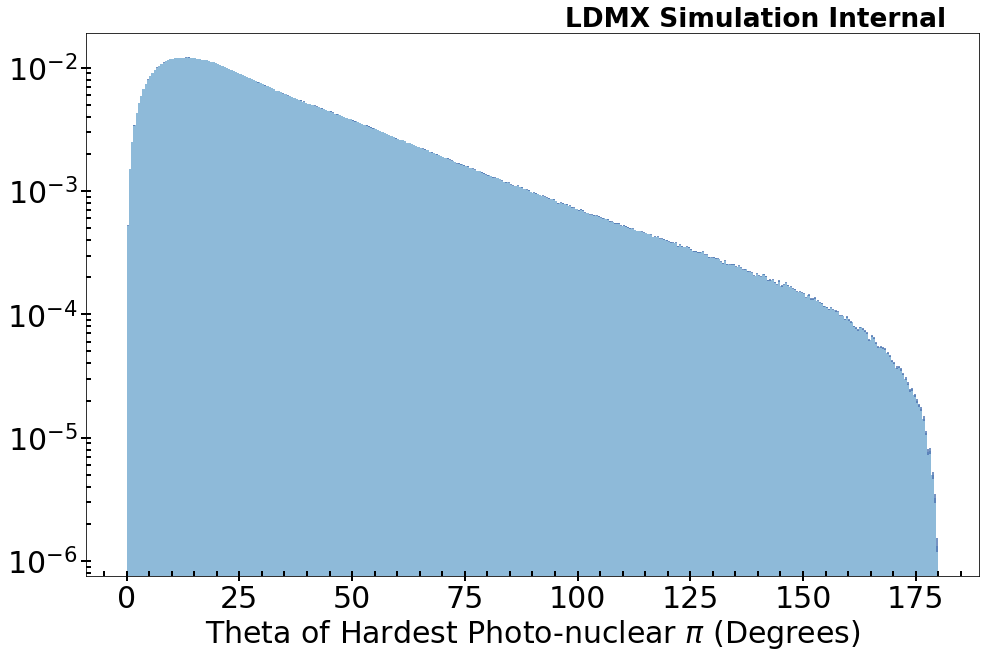

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
draw_histogram1D(ax, histograms['pn/pn_hardest_pi_theta'], norm=True, errors=True,
                 x_label='Theta of Hardest Photo-nuclear $\pi$ (Degrees)')
ax.set_yscale("log")